<a href="https://colab.research.google.com/github/cipalisoc/project1/blob/main/CodingDojo_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 1
By: Christian Palisoc

## Variable name descriptions:
- Item_Identifier	Unique product ID
- Item_Weight	Weight of product
- Item_Fat_Content	Whether the product is low fat or regular
- Item_Visibility	The percentage of total display area of all products in a - store allocated to the particular product
- Item_Type	The category to which the product belongs
- Item_MRP	Maximum Retail Price (list price) of the product
- Outlet_Identifier	Unique store ID
- Outlet_Establishment_Year	The year in which store was established
- Outlet_Size	The size of the store in terms of ground area covered
- Outlet_Location_Type	The type of area in which the store is located
- Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales	Sales of the product in the particular store. **This is the target variable to be predicted.**

## Loading Data

In [ ]:
# Using Pandas to read the sales prediction data set
# data set from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
filename = '/content/drive/MyDrive/Coding Dojo/Week 2: Pandas/sales_predictions.csv'
data_frame = pd.read_csv(filename)


In [ ]:
# Preview the first rows of 'sales_predictions' data and a summary of DataFrame's columns
data_frame.info()
data_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [ ]:
# number of rows and columns, respectively:
data_frame.shape

(8523, 12)

In [ ]:
# datatypes of each variable:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# No Duplcates
data_frame.duplicated().sum()

0

In [ ]:
# Identify missing values
data_frame.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data_frame['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# decided to drop 'Outlet_Size' as it was missing a quarter of data with no way to impute 
data_frame.drop(columns='Outlet_Size', inplace=True)
data_frame.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# decided to fill missing data in 'Item_Weight' with average of all weights
avgweight = data_frame['Item_Weight'].mean()
data_frame['Item_Weight'].fillna(avgweight, inplace=True)

# Confirmed that there are no missing values after addressing them.
data_frame.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Find and fix any inconsistent categories of data; found inconsistencies in Fat Content Column
data_frame['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# updating erroneous data categories "LF", "reg", and "low fat" to correct respective categories. re-checking Fat Content Column to ensure incosistencies are now correct
data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace('LF' , 'Low Fat')
data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace('low fat' , 'Low Fat')
data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace('reg' , 'Regular')

data_frame['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)
data_frame.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Visuals

In [ ]:
# Previewing data frame again to see which colums would be best suited for histogram visualization. I will be illustrating this on the ranges of Item MRP in 
# (cont) relation to the different Fat Content of the Items
data_frame.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
## seeing how many unique fat content types there are
data_frame['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
## slicing out the two different Fat Contents into 2 separate dataframes
LF = data_frame['Item_Fat_Content'] == 'Low Fat'
LF_df = data_frame[LF]

RF = data_frame['Item_Fat_Content'] == 'Regular'
RF_df = data_frame[RF]


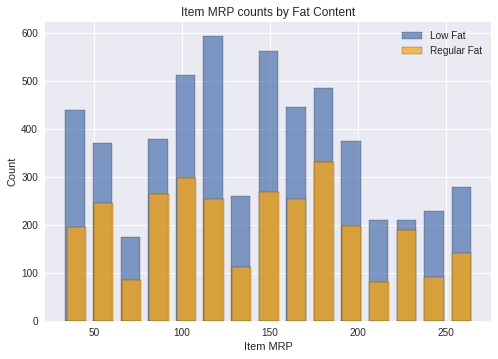

In [ ]:
plt.style.use('seaborn')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.title('Item MRP counts by Fat Content')
LF_df['Item_MRP'].hist(edgecolor='black', bins=15 , alpha = 0.7 , rwidth=0.7 , label='Low Fat');
RF_df['Item_MRP'].hist(edgecolor='black', bins=15 , color='orange' , alpha = 0.7, rwidth=0.7 , label='Regular Fat');
plt.legend(loc='upper right');

- The histogram above shows the distribution of the MRP ranges and the item count of each based on fat content. Low-fat foods are stocked/sold more than regular-fat content foods.

In [ ]:
# The following is the process by which the visual for the item outlet sales for the different Outlet Location Types is created.
## Find out how many outlet location types there are
data_frame['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
## Filter out the three Tiers into their own data frames
T1 = data_frame['Outlet_Location_Type'] == 'Tier 1'
T1_df = data_frame[T1]
Tier1 = T1_df['Item_Outlet_Sales']

T2 = data_frame['Outlet_Location_Type'] == 'Tier 2'
T2_df = data_frame[T2]
Tier2 = T2_df['Item_Outlet_Sales']

T3 = data_frame['Outlet_Location_Type'] == 'Tier 3'
T3_df = data_frame[T3]
Tier3 = T3_df['Item_Outlet_Sales']

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


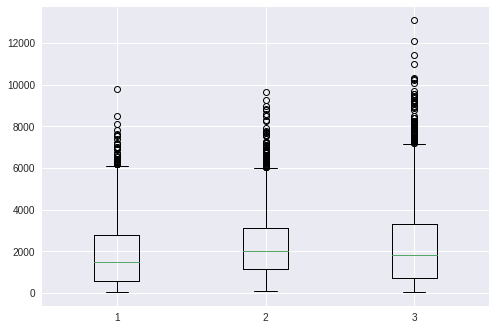

In [ ]:
## Create a Boxplot using the filtered data above
plt.style.use('seaborn')
plt.boxplot([Tier1 , Tier2, Tier3]);


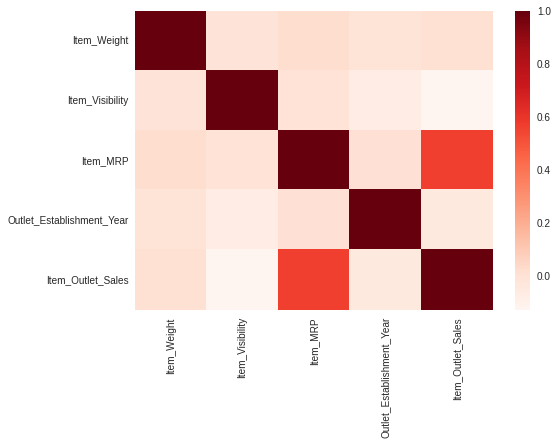

In [ ]:
# Heatmap showing correlation of Columns
corr = data_frame.corr()
sns.heatmap(corr , cmap = 'Reds');

## Explanatory Visuals

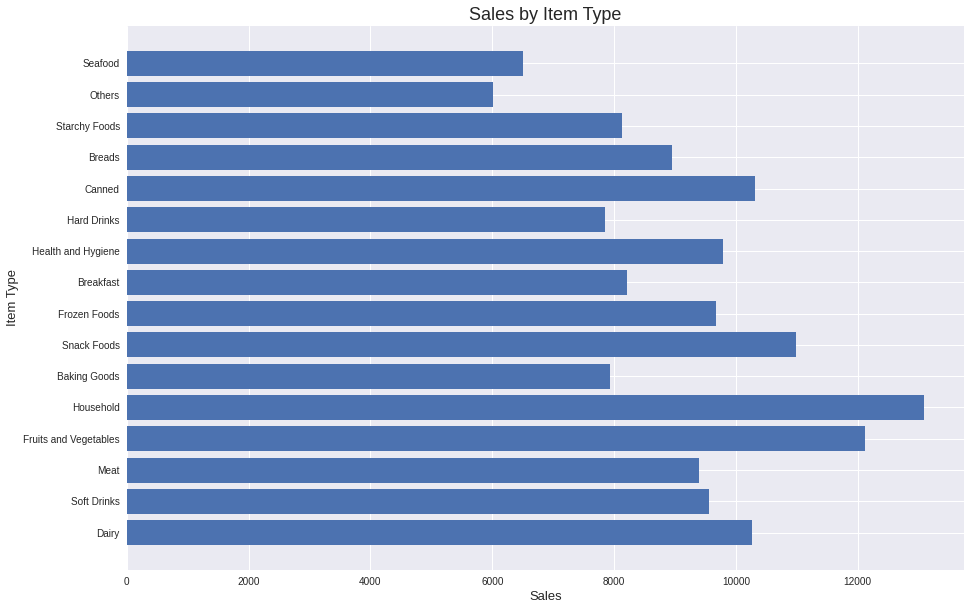

In [ ]:
# Barplot showing sales of item types
Item = data_frame['Item_Type']
Sales = data_frame['Item_Outlet_Sales']

fig = plt.figure(figsize=(15,10))
plt.style.use('seaborn')
plt.xlabel('Sales' , fontsize=13)
plt.ylabel('Item Type' , fontsize=13)
plt.title('Sales by Item Type' , fontsize=18)
plt.barh(Item, Sales);

The barplot above shows the types of items that make up the total sales. We see that the top two are Household good along with Fruits and Vegetables witht the bottom two as Other goods and seafood. 

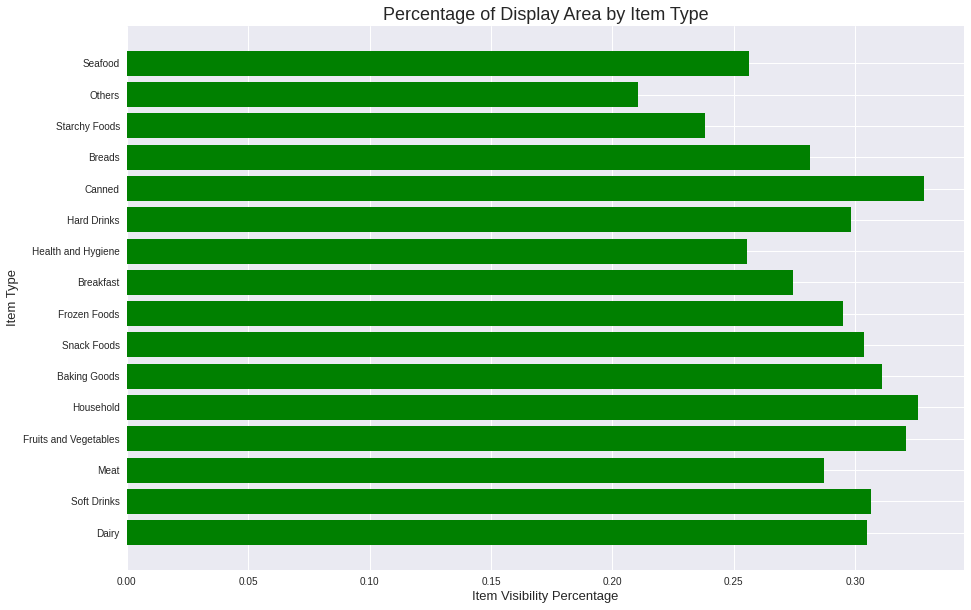

In [ ]:
# Barplot showing item type and visibility
vis = data_frame['Item_Visibility']

fig = plt.figure(figsize=(15,10))
plt.style.use('seaborn')
plt.xlabel('Item Visibility Percentage' , fontsize=13)
plt.ylabel('Item Type' , fontsize=13)
plt.title('Percentage of Display Area by Item Type' , fontsize=18)
plt.barh(Item, vis, color='green');

To see if there was any correlation with sales and item exposure, we plotted the item visibility percentage and found that based on the previous graph of total sales by item, the top two most sold items and the bottom two least sold items looked like it correlated with their respective item exposure percentages. Although, looking at the other item types, it may not be the same for them. 